In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import seaborn as sns
import plotly.express as px
import string
import re
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/w

In [3]:
# Load data
data = pd.read_csv("/kaggle/input/hateval-combined/hateval2019_en.csv")

In [4]:
print(data.shape)

(13000, 5)


# Basic Exploration

In [5]:
data.head()

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0


In [6]:
data.duplicated().sum()

0

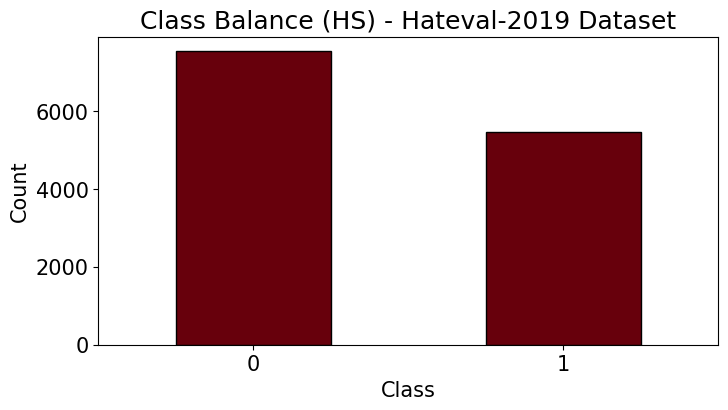

In [15]:
class_counts = data['HS'].value_counts()

# Plot the class balance
plt.figure(figsize=(8, 4))
bars = class_counts.plot(kind='bar', color='#67000C', edgecolor='black')
plt.title('Class Balance (HS) - Hateval-2019 Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig("HS_class_balance_hateval", bbox_inches='tight')
plt.show()

In [16]:
# NA data
data.isnull().sum()

id      0
text    0
HS      0
TR      0
AG      0
dtype: int64

# Most frequent words and bigrams

In [17]:
def preprocess_text(text):
    """
    Preprocesses text data by performing the following steps:
    - Removes HTML tags and URLs
    - Tokenizes the text
    - Converts tokens to lowercase
    - Removes stopwords
    - Lemmatizes tokens

    Args:
        text (str): The text data to preprocess

    Returns:
        str: A preprocessed string
    """
    # Remove HTML tags and URLs
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the preprocessed tokens back into a string
    preprocessed_text = " ".join(tokens)

    return preprocessed_text

In [18]:
# Apply the preprocessing function to the 'text' column
data['text'] = data['text'].apply(preprocess_text)

In [19]:
def generate_ngrams(tweets, n):
    tokenized_tweets = [word_tokenize(tweet.lower()) for tweet in tweets]
    ngrams_list = [list(ngrams(tweet, n)) for tweet in tokenized_tweets if len(tweet) >= n]
    flattened_ngrams = [ngram for tweet in ngrams_list for ngram in tweet]
    return flattened_ngrams

## Most Frequent Words

In [64]:
n = 3

In [65]:
top_n = 20

In [66]:
y_label = {1: "Unigram", 2: "2-gram", 3: "3-gram"}

In [26]:
# # Extract the tweets from the dataset
# tweets = data['text'].tolist()

# # Generate unigrams using the generate_ngrams function
# unigrams = generate_ngrams(tweets, n)

# # Create a frequency distribution of the unigrams
# freq_dist = nltk.FreqDist(unigrams)

# # Get the top 20 most common unigrams
# top_unigrams = freq_dist.most_common(top_n)[::-1]

# # Extract the unigram and frequency values
# unigrams, frequencies = zip(*top_unigrams)

# # Plot the top 20 unigrams
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(unigrams)), frequencies, color="#67000C", edgecolor='black')
# plt.yticks(range(len(unigrams)), unigrams)
# plt.ylabel('Unigram')
# plt.xlabel('Frequency')
# plt.title(f'Top {top_n} {n}-grams in Hate Speech Tweets')
# plt.tight_layout()
# plt.savefig("hateval_top20_1gram_HS")
# plt.show()


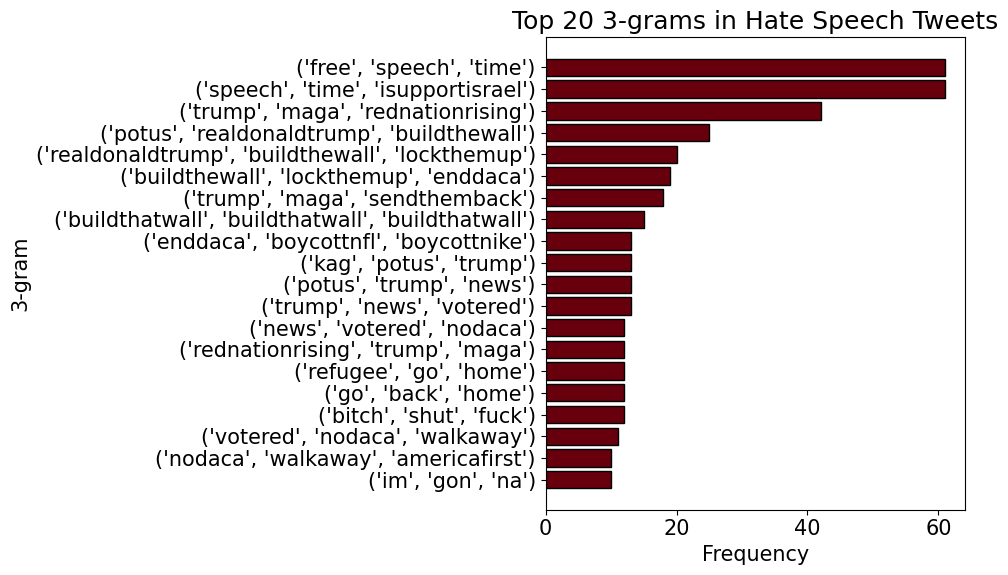

In [67]:
hs_data = data[data.HS == 1]

# Extract the tweets from the dataset
tweets = hs_data['text'].tolist()

# Generate unigrams using the generate_ngrams function
unigrams = generate_ngrams(tweets, n)

# Create a frequency distribution of the unigrams
freq_dist = nltk.FreqDist(unigrams)

# Create a frequency distribution of the unigrams
freq_dist = nltk.FreqDist(unigrams)

# Get the top 20 most common unigrams
top_unigrams = freq_dist.most_common(top_n)[::-1]

# Extract the unigram and frequency values
unigrams, frequencies = zip(*top_unigrams)

# Plot the top 20 unigrams
plt.figure(figsize=(10, 6))
plt.barh(range(len(unigrams)), frequencies, color="#67000C", edgecolor='black')
plt.yticks(range(len(unigrams)), unigrams)
plt.ylabel(y_label[n])
plt.xlabel('Frequency')
plt.title(f'Top {top_n} {n}-grams in Hate Speech Tweets')
plt.tight_layout()
plt.savefig(f"hateval_top20_{n}gram_HS")
plt.show()

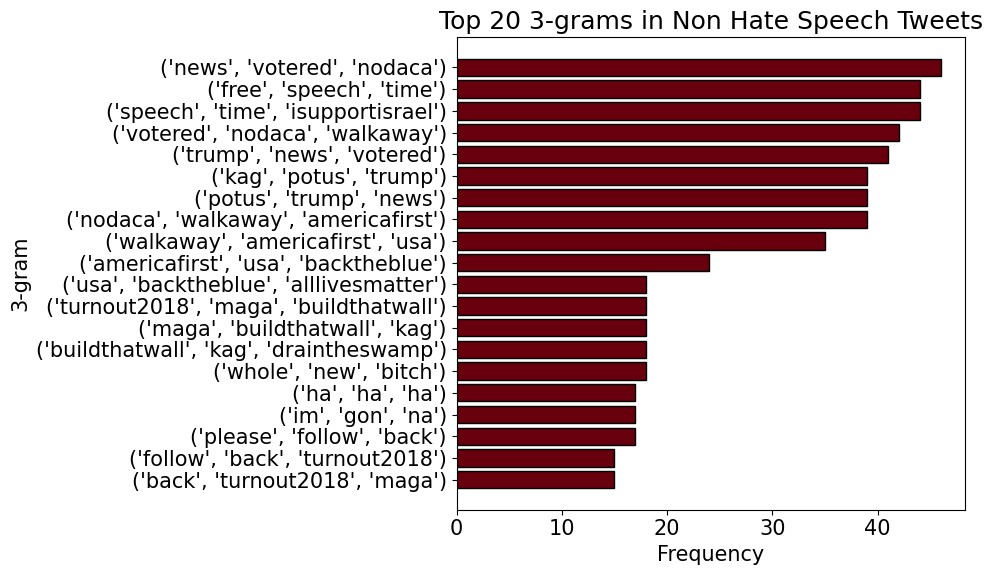

In [68]:
non_hs_data = data[data.HS == 0]

# Extract the tweets from the dataset
tweets = non_hs_data['text'].tolist()

# Generate unigrams using the generate_ngrams function
unigrams = generate_ngrams(tweets, n)

# Create a frequency distribution of the unigrams
freq_dist = nltk.FreqDist(unigrams)

# Create a frequency distribution of the unigrams
freq_dist = nltk.FreqDist(unigrams)

# Get the top 20 most common unigrams
top_unigrams = freq_dist.most_common(top_n)[::-1]

# Extract the unigram and frequency values
unigrams, frequencies = zip(*top_unigrams)

# Plot the top 20 unigrams
plt.figure(figsize=(10, 6))
plt.barh(range(len(unigrams)), frequencies, color="#67000C", edgecolor='black')
plt.yticks(range(len(unigrams)), unigrams)
plt.ylabel(y_label[n])
plt.xlabel('Frequency')
plt.title(f'Top {top_n} {n}-grams in Non Hate Speech Tweets')
plt.tight_layout()
plt.savefig(f"hateval_top20_{n}gram_NHS")
plt.show()